In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.5)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 25

### Pseudo-$\chi^2$ loss landscape

In [131]:
# Load pseudo-chi2 data
a_b_chi2           = np.load('./flow_data/flow_data_pseudo_chi2_fixed_bin_a_b_Nbatch_2e5.npy')
a_b_gradients_chi2 = np.load('./flow_data/flow_data_pseudo_chi2_fixed_bin_a_b_gradients_Nbatch_2e5.npy')
loss_grid_chi2     = np.load('./flow_data/flow_data_pseudo_chi2_fixed_bin_losses_Nbatch_2e5.npy')

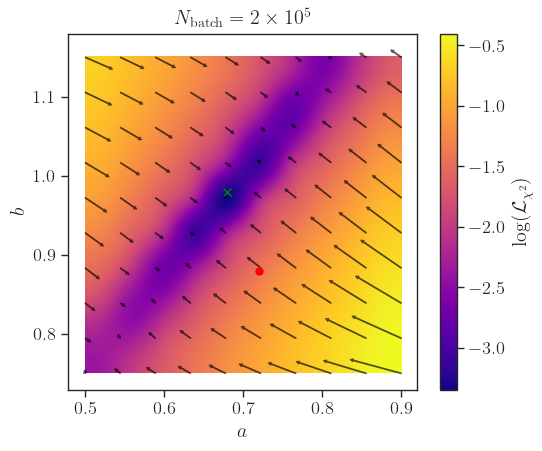

In [49]:
fig, ax = plt.subplots(1,1,figsize=(6,5))

# Calculate the magnitude of each vector in a_b_gradients
magnitudes = np.linalg.norm(a_b_gradients_chi2, axis=1)

# Set the background color based on the normalized magnitude
norm = mcolors.Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape = (int(np.sqrt(len(magnitudes))), int(np.sqrt(len(magnitudes))))
magnitudes_grid = magnitudes.reshape(grid_shape).T

# Create a heatmap of the gradient magnitudes
heatmap = ax.imshow((np.log10(loss_grid_chi2)).reshape(grid_shape).T, cmap=cmap, origin='lower', extent=(np.min(a_b_chi2[:, 0]), np.max(a_b_chi2[:, 0]), np.min(a_b_chi2[:, 1]), np.max(a_b_chi2[:, 1])), interpolation='spline36')

# Add a colorbar to show the magnitude scale
fig.colorbar(heatmap, ax=ax, label=r'$\log (\mathcal{L}_{\chi^2})$')

# Plot arrows for each point and direction
for point, gradient in zip(a_b_chi2, a_b_gradients_chi2):
    ax.arrow(point[0], point[1], -gradient[0]/1e2, -gradient[1]/1e2, head_width=0.004, head_length=0.004, fc='black', ec='black', alpha = 0.5)

# Plot the target and base points
a_b_target = np.array([0.68, 0.98]) # Monash
ax.plot(a_b_target[0], a_b_target[1], 'x', color='green', label = 'Target', ms = 6, linewidth=10)
base = np.array([0.72, 0.88])
ax.plot(base[0], base[1], 'o', color = 'red', label = 'Base', ms = 5, linewidth=10)

# Set title and labels
ax.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')

fig.tight_layout()
#fig.savefig('ARRG_flow_psuedo_chi2_loss_fixed_bin_high_res_Nbatch_2e5.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
#fig.savefig('ARRG_flow_psuedo_chi2_loss_fixed_bin_high_res_Nbatch_2e5.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Pseudo-$\chi^2$ loss landscape with high-resolution patch

In [129]:
# Connect the above plot to a high-res version centered on the target region
a_b_chi2_hr           = np.load('./flow_data/flow_data_pseudo_chi2_fixed_bin_high_res_a_b_Nbatch_2e5.npy')
a_b_gradients_chi2_hr = np.load('./flow_data/flow_data_pseudo_chi2_fixed_bin_high_res_a_b_gradients_Nbatch_2e5.npy')
loss_grid_chi2_hr     = np.load('./flow_data/flow_data_pseudo_chi2_fixed_bin_high_res_losses_Nbatch_2e5.npy')

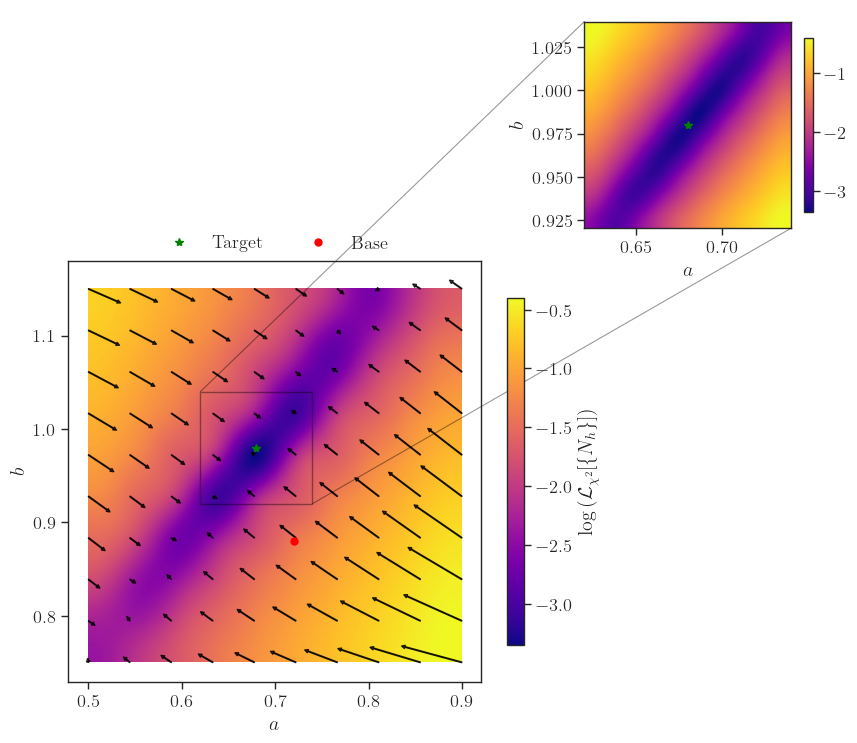

In [134]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,9), gridspec_kw={'height_ratios':[0.5, 1.0], 'width_ratios':[1, 0.5]})

# Get rid of superfluous axes
ax1.axis('off')
ax4.axis('off')

# Calculate the magnitude of each vector in a_b_gradients
magnitudes = np.linalg.norm(a_b_gradients_chi2, axis=1)

# Set the background color based on the normalized magnitude
norm = mcolors.Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape = (int(np.sqrt(len(magnitudes))), int(np.sqrt(len(magnitudes))))
magnitudes_grid = magnitudes.reshape(grid_shape).T

# Create a heatmap of the gradient magnitudes
heatmap = ax3.imshow((np.log10(loss_grid_chi2)).reshape(grid_shape).T, cmap=cmap, origin='lower', extent=(np.min(a_b_chi2[:, 0]), np.max(a_b_chi2[:, 0]), np.min(a_b_chi2[:, 1]), np.max(a_b_chi2[:, 1])), interpolation='lanczos')

# Add a colorbar to show the magnitude scale
fig.colorbar(heatmap, ax=ax3, label=r'$\log \left(\mathcal{L}_{\chi^2}[\{ N_h \}]\right)$', shrink=0.75)

import matplotlib.patches as patches

# Plot arrows for each point and direction
for point, gradient in zip(a_b_chi2, a_b_gradients_chi2):
    ax3.arrow(point[0], point[1], -gradient[0]/1e2, -gradient[1]/1e2, head_width=0.004, head_length=0.004, fc='black', ec='black', alpha = 0.8)

# Plot the target and base points
a_b_target = np.array([0.68, 0.98]) # Monash
ax3.plot(a_b_target[0], a_b_target[1], '*', color='green', ms = 6, linewidth=10, label = r'$\mathrm{Target}$')
base = np.array([0.72, 0.88])
ax3.plot(base[0], base[1], 'o', color = 'red', ms = 5, linewidth=10, label = r'$\mathrm{Base}$')

# Set the axis labels
ax3.set_xlabel(r'$a$')
ax3.set_ylabel(r'$b$')

# Add a legend
pos = ax3.get_position()
ax3.set_position([pos.x0, pos.y0, pos.width, pos.height])
ax3.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.1),
    ncol=2,
    frameon=False
)

# High-resolution pop out 

# Calculate the magnitude of each vector in a_b_gradients
magnitudes_hr = np.linalg.norm(a_b_gradients_chi2_hr, axis=1)

# Set the background color based on the normalized magnitude
norm_hr = mcolors.Normalize(vmin=np.min(magnitudes_hr), vmax=np.max(magnitudes_hr))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape_hr = (int(np.sqrt(len(magnitudes_hr))), int(np.sqrt(len(magnitudes_hr))))
magnitudes_grid_hr = magnitudes_hr.reshape(grid_shape_hr).T

# Create a heatmap of the gradient magnitudes
heatmap_hr = ax2.imshow((np.log10(loss_grid_chi2_hr)).reshape(grid_shape_hr).T, cmap=cmap, origin='lower', extent=(np.min(a_b_chi2_hr[:, 0]), np.max(a_b_chi2_hr[:, 0]), np.min(a_b_chi2_hr[:, 1]), np.max(a_b_chi2_hr[:, 1])), interpolation='lanczos')

# Add a colorbar to show the magnitude scale
fig.colorbar(heatmap, ax=ax2, shrink=0.75)

# Mark the target point
ax2.plot(a_b_target[0], a_b_target[1], '*', color='green', label = 'Target', ms = 6, linewidth=10)

# Set the axis labels
ax2.set_xlabel(r'$a$')
ax2.set_ylabel(r'$b$')

# Add rectangle denoting high res region
rect = patches.Rectangle((0.62, 0.92), 0.12, 0.12, linewidth=1, edgecolor='black', facecolor='none', alpha = 0.4)
# Add the patch to the Axes
ax3.add_patch(rect)

plt.subplots_adjust(wspace=0.0, hspace=0.0)

from matplotlib.patches import ConnectionPatch

# Add the connecting lines
conn = ConnectionPatch(
    xyA=(0.62, 0.92 + 0.12), coordsA='data', axesA=ax3,
    xyB=(np.min(a_b_chi2_hr[:, 0]), np.max(a_b_chi2_hr[:, 1])), coordsB='data', axesB=ax2,
    color='black', alpha = 0.4
)
ax3.add_artist(conn)
conn.set_in_layout(False) # Remove from layout calculations

conn1 = ConnectionPatch(
    xyA=(0.62 + 0.12, 0.92), coordsA='data', axesA=ax3,
    xyB=(np.max(a_b_chi2_hr[:, 0]), np.min(a_b_chi2_hr[:, 1])), coordsB='data', axesB=ax2,
    color='black', alpha = 0.4
)
ax3.add_artist(conn1)
conn1.set_in_layout(False) # Remove from layout calculations

fig.savefig('ARRG_flow_psuedo_chi2_loss_Nbatch_2e5.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig('ARRG_flow_psuedo_chi2_loss_Nbatch_2e5.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Macroscopic 1D EMD (multiplicity) loss landscape

In [112]:
# Load data for the macroscopic 1d wasserstein
a_b_mult_EMD           = np.load('./flow_data/flow_data_wass1d_macro_fixed_bin_a_b_Nbatch_2e5.npy')
a_b_gradients_mult_EMD = np.load('./flow_data/flow_data_wass1d_macro_fixed_bin_a_b_gradients_Nbatch_2e5.npy')
loss_grid_mult_EMD     = np.load('./flow_data/flow_data_wass1d_macro_fixed_bin_losses_Nbatch_2e5.npy')

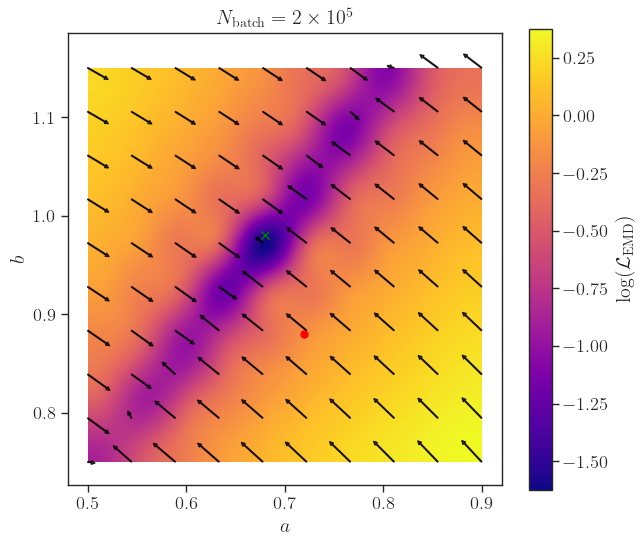

In [73]:
fig, ax = plt.subplots(1,1,figsize=(7,6))

# Calculate the magnitude of each vector in a_b_gradients
magnitudes = np.linalg.norm(a_b_gradients_mult_EMD, axis=1)

# Set the background color based on the normalized magnitude
norm = mcolors.Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape = (int(np.sqrt(len(magnitudes))), int(np.sqrt(len(magnitudes))))
magnitudes_grid = magnitudes.reshape(grid_shape).T

# Create a heatmap of the gradient magnitudes
heatmap = ax.imshow((np.log10(loss_grid_mult_EMD)).reshape(grid_shape).T, cmap=cmap, origin='lower', extent=(np.min(a_b_mult_EMD[:, 0]), np.max(a_b_mult_EMD[:, 0]), np.min(a_b_mult_EMD[:, 1]), np.max(a_b_mult_EMD[:, 1])), interpolation='lanczos')

# Add a colorbar to show the magnitude scale
cb = fig.colorbar(heatmap, ax=ax, label=r'$\log (\mathcal{L}_{\mathrm{EMD}})$')

# Plot arrows for each point and direction
for point, gradient in zip(a_b_mult_EMD, a_b_gradients_mult_EMD):
    ax.arrow(point[0], point[1], -gradient[0]/8e2, -gradient[1]/8e2, head_width=0.004, head_length=0.004, fc='black', ec='black', alpha = 0.8)

a_b_target = np.array([0.68, 0.98]) # Monash
ax.plot(a_b_target[0], a_b_target[1], 'x', color='green', label = 'Target', ms = 6, linewidth=10)
base = np.array([0.72, 0.88])
ax.plot(base[0], base[1], 'o', color = 'red', label = 'Base', ms = 5, linewidth=10)

ax.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')

fig.tight_layout()
fig.savefig('ARRG_flow_wass1d_macro_loss_Nbatch_2e5.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
#fig.savefig('ARRG_flow_wass1d_macro_loss_Nbatch_2e5.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### 4x4 loss landscape grid

In [121]:
a_b = np.load(f"./classifier_figs/data/ab_grid_0.72_0.88_100.npy")

loss_grid_score = np.load(f"./classifier_figs/data/loss_grid_class_0.72_0.88_100.npy")
gradients_score = np.load(f"./classifier_figs/data/gradients_class_0.72_0.88_100.npy")

loss_grid_2D = np.load(f"./classifier_figs/data/loss_grid_2D_0.72_0.88_100.npy")
gradients_2D = np.load(f"./classifier_figs/data/gradients_2D_0.72_0.88_100.npy")

loss_grid_3D = np.load(f"./classifier_figs/data/loss_grid_3D_0.72_0.88_100.npy")
gradients_3D = np.load(f"./classifier_figs/data/gradients_3D_0.72_0.88_100.npy")

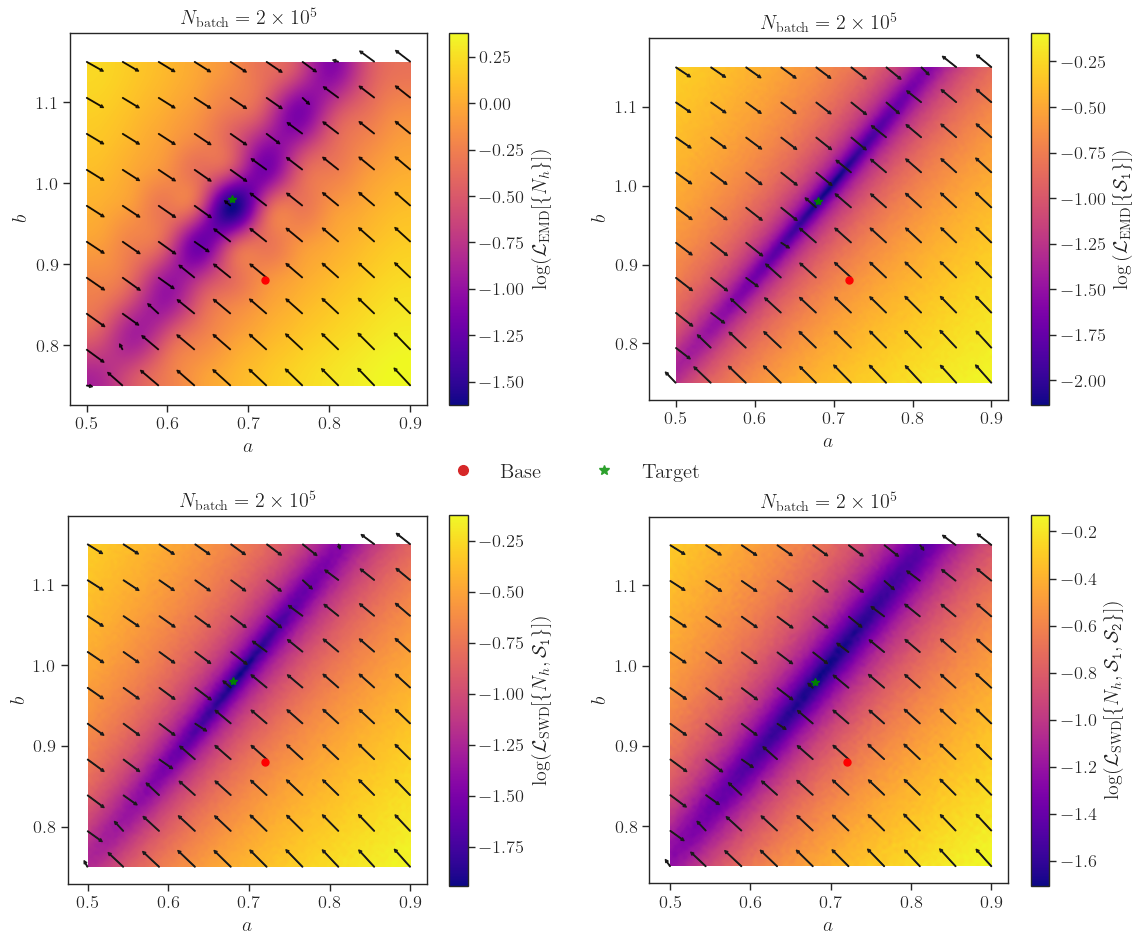

In [125]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,10))

# Calculate the magnitude of each vector in a_b_gradients
magnitudes_EMD = np.linalg.norm(a_b_gradients_mult_EMD, axis=1)
magnitudes_score = np.linalg.norm(gradients_score, axis=1)
magnitudes_2D = np.linalg.norm(gradients_2D, axis=1)
magnitudes_3D = np.linalg.norm(gradients_3D, axis=1)

# Set the background color based on the normalized magnitude
norm_EMD = mcolors.Normalize(vmin=np.min(magnitudes_EMD), vmax=np.max(magnitudes_EMD))
norm_score = mcolors.Normalize(vmin=np.min(magnitudes_score), vmax=np.max(magnitudes_score))
norm_2D = mcolors.Normalize(vmin=np.min(magnitudes_2D), vmax=np.max(magnitudes_2D))
norm_3D = mcolors.Normalize(vmin=np.min(magnitudes_3D), vmax=np.max(magnitudes_3D))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape_EMD = (int(np.sqrt(len(magnitudes_EMD))), int(np.sqrt(len(magnitudes_EMD))))
grid_shape_score = (int(np.sqrt(len(magnitudes_score))), int(np.sqrt(len(magnitudes_score))))
grid_shape_2D = (int(np.sqrt(len(magnitudes_2D))), int(np.sqrt(len(magnitudes_2D))))
grid_shape_3D = (int(np.sqrt(len(magnitudes_3D))), int(np.sqrt(len(magnitudes_3D))))
magnitudes_grid_EMD = magnitudes_EMD.reshape(grid_shape_EMD).T
magnitudes_grid_score = magnitudes_score.reshape(grid_shape_score).T
magnitudes_grid_2D = magnitudes_2D.reshape(grid_shape_2D).T
magnitudes_grid_3D = magnitudes_3D.reshape(grid_shape_3D).T

# Create a heatmap of the gradient magnitudes
heatmap_EMD = ax1.imshow((np.log10(loss_grid_mult_EMD)).reshape(grid_shape_EMD).T, cmap=cmap, origin='lower', extent=(np.min(a_b_mult_EMD[:, 0]), np.max(a_b_mult_EMD[:, 0]), np.min(a_b_mult_EMD[:, 1]), np.max(a_b_mult_EMD[:, 1])), interpolation='lanczos')
heatmap_score = ax2.imshow((np.log10(loss_grid_score)).reshape(grid_shape_score).T, cmap=cmap, origin='lower', extent=(np.min(a_b[:, 0]), np.max(a_b[:, 0]), np.min(a_b[:, 1]), np.max(a_b[:, 1])), interpolation='lanczos')
heatmap_2D = ax3.imshow((np.log10(loss_grid_2D)).reshape(grid_shape_2D).T, cmap=cmap, origin='lower', extent=(np.min(a_b[:, 0]), np.max(a_b[:, 0]), np.min(a_b[:, 1]), np.max(a_b[:, 1])), interpolation='lanczos')
heatmap_3D = ax4.imshow((np.log10(loss_grid_3D)).reshape(grid_shape_3D).T, cmap=cmap, origin='lower', extent=(np.min(a_b[:, 0]), np.max(a_b[:, 0]), np.min(a_b[:, 1]), np.max(a_b[:, 1])), interpolation='lanczos')

# Add a colorbar to show the magnitude scale
cb_EMD = fig.colorbar(heatmap_EMD, ax=ax1, label=r'$\log (\mathcal{L}_{\mathrm{EMD}}[\{N_h\}])$')
cb_score = fig.colorbar(heatmap_score, ax=ax2, label=r'$\log \left(\mathcal{L}_{\mathrm{EMD}}[\{\textcolor{red}{\mathcal{S}_{\mathtt{1}}}\}]\right)$')
cb_2D = fig.colorbar(heatmap_2D, ax=ax3, label=r'$\log (\mathcal{L}_{\mathrm{SWD}}[\{ N_h, \textcolor{red}{\mathcal{S}_{\mathtt{1}}} \}])$')
cb_3D = fig.colorbar(heatmap_3D, ax=ax4, label=r'$\log (\mathcal{L}_{\mathrm{SWD}}[\{ N_h, \textcolor{red}{\mathcal{S}_{\mathtt{1}}}, \textcolor{blue}{\mathcal{S}_{\mathtt{2}}} \}])$')

# Plot arrows for each point and direction
for point, gradient in zip(a_b_mult_EMD, a_b_gradients_mult_EMD):
    ax1.arrow(point[0], point[1], -gradient[0]/8e2, -gradient[1]/8e2, head_width=0.004, head_length=0.004, fc='black', ec='black', alpha = 0.8)

# Subsample the grid for evenly spaced arrows (10x10)
subsample_size = min(100, 10)
a_linspace_score = np.linspace(0, grid_shape_score[0] - 1, subsample_size, dtype=int)
b_linspace_score = np.linspace(0, grid_shape_score[1] - 1, subsample_size, dtype=int)

for i in a_linspace_score:
    for j in b_linspace_score:
        idx = i * grid_shape_score[1] + j  # Calculate 1D index
        point = a_b[idx]
        gradient = gradients_score[idx]
        ax2.arrow(point[0], point[1], gradient[0] / 1e2, gradient[1] / 1e2, head_width=0.004, head_length=0.004, fc='k', ec='k')

a_linspace_2D = np.linspace(0, grid_shape_2D[0] - 1, subsample_size, dtype=int)
b_linspace_2D = np.linspace(0, grid_shape_2D[1] - 1, subsample_size, dtype=int)

for i in a_linspace_2D:
    for j in b_linspace_2D:
        idx = i * grid_shape_2D[1] + j  # Calculate 1D index
        point = a_b[idx]
        gradient = gradients_2D[idx]
        ax3.arrow(point[0], point[1], gradient[0] / 1e2, gradient[1] / 1e2, head_width=0.004, head_length=0.004, fc='k', ec='k')

a_linspace_3D = np.linspace(0, grid_shape_3D[0] - 1, subsample_size, dtype=int)
b_linspace_3D = np.linspace(0, grid_shape_3D[1] - 1, subsample_size, dtype=int)

for i in a_linspace_3D:
    for j in b_linspace_3D:
        idx = i * grid_shape_3D[1] + j  # Calculate 1D index
        point = a_b[idx]
        gradient = gradients_3D[idx]
        ax4.arrow(point[0], point[1], gradient[0] / 1e2, gradient[1] / 1e2, head_width=0.004, head_length=0.004, fc='k', ec='k')

a_b_target = np.array([0.68, 0.98]) # Monash
ax1.plot(a_b_target[0], a_b_target[1], '*', color='green', label = r'$\mathrm{Target}$', ms = 6, linewidth=10)
ax2.plot(a_b_target[0], a_b_target[1], '*', color='green', ms = 6, linewidth=10)
ax3.plot(a_b_target[0], a_b_target[1], '*', color='green', ms = 6, linewidth=10)
ax4.plot(a_b_target[0], a_b_target[1], '*', color='green', ms = 6, linewidth=10)
base = np.array([0.72, 0.88])
ax1.plot(base[0], base[1], 'o', color = 'red', label = r'$\mathrm{Base}$', ms = 5, linewidth=10)
ax2.plot(base[0], base[1], 'o', color = 'red', ms = 5, linewidth=10)
ax3.plot(base[0], base[1], 'o', color = 'red', ms = 5, linewidth=10)
ax4.plot(base[0], base[1], 'o', color = 'red', ms = 5, linewidth=10)

ax1.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
ax1.set_xlabel(r'$a$')
ax1.set_ylabel(r'$b$')

ax2.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
ax2.set_xlabel(r'$a$')
ax2.set_ylabel(r'$b$')

ax3.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
ax3.set_xlabel(r'$a$')
ax3.set_ylabel(r'$b$')

ax4.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
ax4.set_xlabel(r'$a$')
ax4.set_ylabel(r'$b$')

# Custom legend
from matplotlib.lines import Line2D

legend = [Line2D([0], [0], marker='o', markersize = 7, linewidth = 0.0, color = 'tab:red', label = r'$ij=\mu e$'),
          Line2D([0], [0], marker='*', markersize = 7, linewidth = 0.0, color = 'tab:green', label = r'$ij=\mu e$')]

# Create the figure
#fig.legend(frameon = False)
fig.legend(legend, [r'$\mathrm{Base}$', r'$\mathrm{Target}$'], frameon = False, fontsize=15, ncols = 2, loc = 'center')

fig.tight_layout()
fig.savefig("loss_landscapes.pdf", dpi=300, bbox_inches='tight',backend='pgf')

### Observables - hadron multiplicity $N_h$

In [3]:
# Import the multiplicity data 
mult_target_PATH = "./observable_figs/data/pgun_qqbar_hadrons_mult_a_0.68_b_0.98_PH_vs_IS_1e6.dat"
mult_base_PATH_v1 = "./observable_figs/data/pgun_qqbar_hadrons_mult_a_0.72_b_0.88_PH_vs_IS_1e6.dat"
mult_base_PATH_v2 = "./observable_figs/data/pgun_qqbar_hadrons_mult_a_0.64_b_1.08_PH_vs_IS_1e6.dat"

weights_base_v1 = "./observable_figs/data/pgun_qqbar_weights_a_0.72_0.68_b_0.88_0.98_PH_vs_IS_1e6.dat"
weights_base_v2 = "./observable_figs/data/pgun_qqbar_weights_a_0.64_0.68_b_1.08_0.98_PH_vs_IS_1e6.dat"

mult_target = np.loadtxt(mult_target_PATH)
mult_base_v1 = np.loadtxt(mult_base_PATH_v1)
mult_base_v2 = np.loadtxt(mult_base_PATH_v2)

weights_base_v1 = np.loadtxt(weights_base_v1)
weights_base_v2 = np.loadtxt(weights_base_v2)

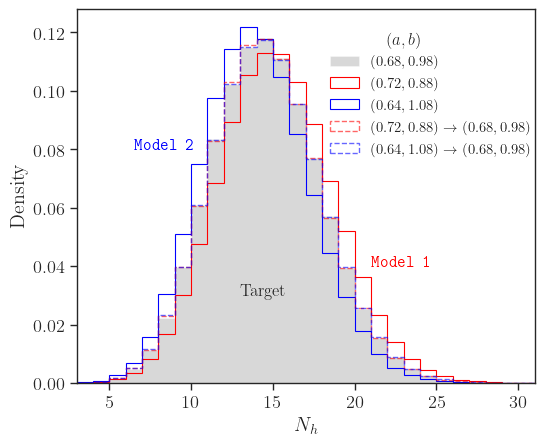

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

# Extract minimum and maximum bin counts
min_count = min(min(mult_target), min(mult_base_v1), min(mult_base_v2))
max_count = max(max(mult_target), max(mult_base_v1), max(mult_base_v2))

# Create bins
bins = np.linspace(min_count, max_count, int(max_count - min_count + 1))

counts, bins, _ = ax.hist(mult_target, bins = bins, histtype='stepfilled', color='gray', alpha = 0.3, label=r'$(0.68, 0.98)$', density=True)
ax.hist(mult_base_v1, bins=bins, histtype='step', color='red',  density=True, label=r'$(0.72, 0.88)$')
ax.hist(mult_base_v2, bins=bins, histtype='step', color='blue', density=True, label=r'$(0.64, 1.08)$')

ax.hist(mult_base_v1, bins=bins, histtype='step', color='red', label=r'$(0.72, 0.88) \to (0.68, 0.98)$', density=True, alpha = 0.6, weights=weights_base_v1, linewidth = 1.0, linestyle='--')
ax.hist(mult_base_v2, bins=bins, histtype='step', color='blue',label=r'$(0.64, 1.08) \to (0.68, 0.98)$', density=True, alpha = 0.6, weights=weights_base_v2, linewidth = 1.0, linestyle='--')

ax.set_xlabel(r'$N_h$')
ax.set_ylabel(r'$\mathrm{Density}$')

ax.set_xlim(3, 31)

ax.legend(frameon=False, fontsize = 10.5, ncols = 1, bbox_to_anchor=(0.525,.57))
ax.text(22, 0.116, r'$(a,b)$', fontsize = 12)
ax.text(13, 0.03, r'$\mathrm{Target}$', fontsize = 12)
ax.text(6.5, 0.08, r'$\texttt{Model 2}$', color = 'blue', fontsize = 12)
ax.text(21, 0.04, r'$\texttt{Model 1}$', color = 'red', fontsize = 12)
fig.tight_layout()
fig.savefig('multiplicity.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Reweighting metrics $\mu$ and $N_{\text{eff}}$

In [47]:
# Path to reweighting metrics
base_1_PATH = "./reweighting_metrics_figs/data/weight_metrics_base_a_0.64_b_1.08_n_5e5.dat"

with open (base_1_PATH, 'r') as f:
    lines = f.readlines()

counter = 0
type_counter = 0
for line in lines:
    if line != '\n':
        if counter == 0 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 0 and type_counter == 1: 
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b1 = np.array([metrics_i])
            counter += 1
            type_counter = 0
        elif counter == 1 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 1 and type_counter == 1:
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b1 = np.append(metrics_b1, np.array([metrics_i]), axis = 0)
            type_counter = 0

a = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6])
b = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
one_minus_mu_b1 = metrics_b1[:,2]
one_minus_mu_b1 = np.reshape(one_minus_mu_b1, (a.shape[0],b.shape[0]))
one_minus_mu_b1 = np.rot90(np.fliplr(one_minus_mu_b1))
Neff_b1 = metrics_b1[:,4]
Neff_b1 = np.reshape(Neff_b1, (a.shape[0],b.shape[0]))
Neff_b1 = np.rot90(np.fliplr(Neff_b1))

In [48]:
# Path to reweighting metrics
base_2_PATH = "./reweighting_metrics_figs/data/weight_metrics_base_a_0.72_b_0.88_n_5e5.dat"

with open (base_2_PATH, 'r') as f:
    lines = f.readlines()

counter = 0
type_counter = 0
for line in lines:
    if line != '\n':
        if counter == 0 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 0 and type_counter == 1: 
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b2 = np.array([metrics_i])
            counter += 1
            type_counter = 0
        elif counter == 1 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 1 and type_counter == 1:
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b2 = np.append(metrics_b2, np.array([metrics_i]), axis = 0)
            type_counter = 0

a = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6])
b = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
one_minus_mu_b2 = metrics_b2[:,2]
one_minus_mu_b2 = np.reshape(one_minus_mu_b2, (a.shape[0],b.shape[0]))
one_minus_mu_b2 = np.rot90(np.fliplr(one_minus_mu_b2))
Neff_b2 = metrics_b2[:,4]
Neff_b2 = np.reshape(Neff_b2, (a.shape[0],b.shape[0]))
Neff_b2 = np.rot90(np.fliplr(Neff_b2))

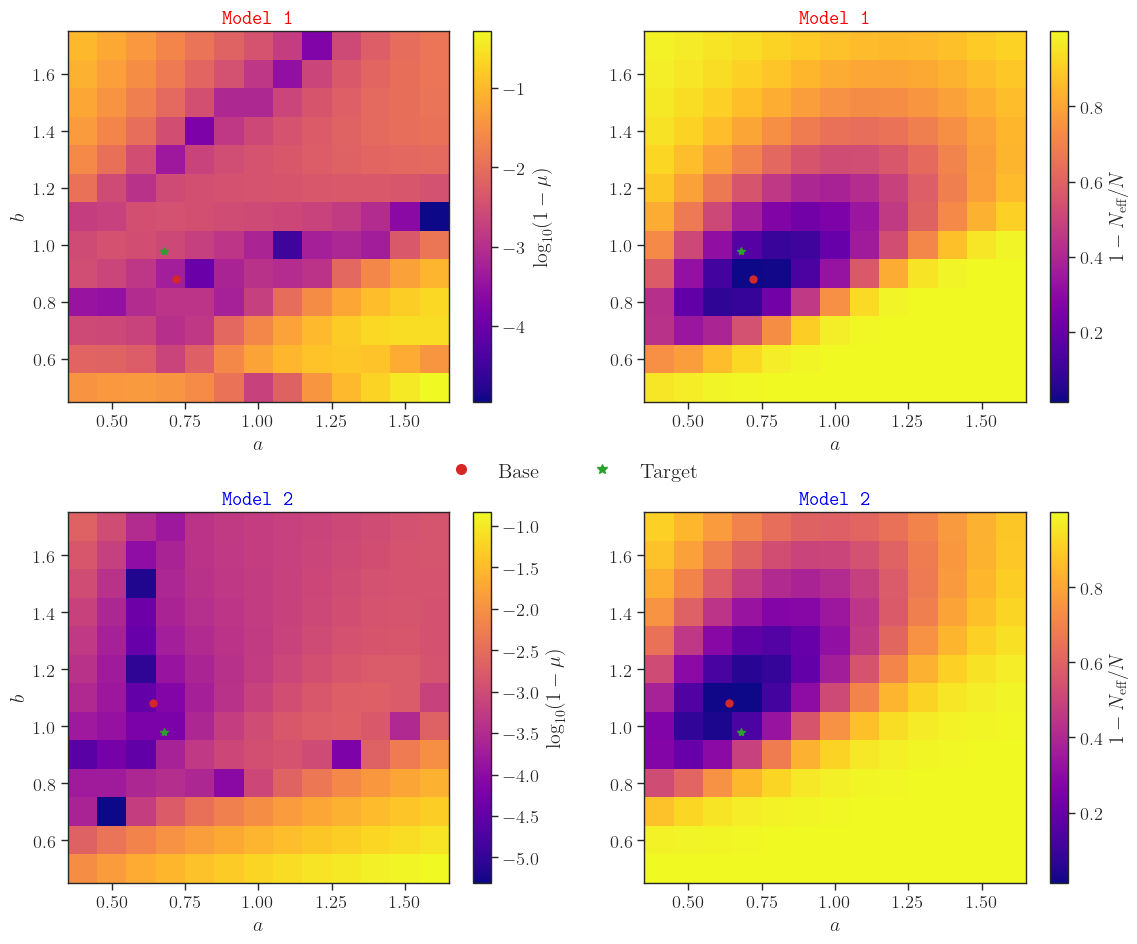

In [137]:
# Make composite figure
fig, axs = plt.subplots(2, 2, figsize=(12,10))
mesh1 = axs[1,0].pcolormesh(a, b, np.log10(one_minus_mu_b1), shading='nearest', cmap = 'plasma', label = r'$\texttt{Model 1}$')
mesh2 = axs[1,1].pcolormesh(a, b, 1-Neff_b1, shading='nearest', cmap = 'plasma', label = r'$\texttt{Model 1}$')
axs[1,0].plot(0.64, 1.08, marker = 'o', color = 'tab:red', markersize = 5)
axs[1,1].plot(0.64, 1.08, marker = 'o', color = 'tab:red', markersize = 5)
axs[0,0].set_xlabel(r'$a$')
axs[0,0].set_ylabel(r'$b$')
axs[0,1].set_xlabel(r'$a$')

mesh3 = axs[0,0].pcolormesh(a, b, np.log10(one_minus_mu_b2), shading='nearest', cmap = 'plasma', label = r'$\texttt{Model 1}$')
mesh4 = axs[0,1].pcolormesh(a, b, 1-Neff_b2, shading='nearest', cmap = 'plasma', label = r'$\texttt{Model 1}$')
axs[0,0].plot(0.72, 0.88, marker = 'o', color = 'tab:red', markersize = 5)
axs[0,1].plot(0.72, 0.88, marker = 'o', color = 'tab:red', markersize = 5)
axs[1,0].set_xlabel(r'$a$')
axs[1,0].set_ylabel(r'$b$')
axs[1,1].set_xlabel(r'$a$')

# Place target points
axs[0,0].plot(0.68, 0.98, marker = '*', color = 'tab:green', markersize = 6)
axs[0,1].plot(0.68, 0.98, marker = '*', color = 'tab:green', markersize = 6)
axs[1,0].plot(0.68, 0.98, marker = '*', color = 'tab:green', markersize = 6)
axs[1,1].plot(0.68, 0.98, marker = '*', color = 'tab:green', markersize = 6)

#axs[0,0].text(1.37, 1.65, r'$\texttt{Model 1}$', color='red', fontsize = 12,
#        bbox=dict(facecolor='white', alpha = 1.0, edgecolor='gray', boxstyle='square,pad=0.5'))

#axs[0,1].text(1.37, 1.65, r'$\texttt{Model 1}$', color='black', fontsize = 12,
#        bbox=dict(facecolor='white', alpha = 0.8, edgecolor='black', boxstyle='round,pad=0.5'))

#axs[1,0].text(1.37, 1.65, r'$\texttt{Model 2}$', color='black', fontsize = 12,
#        bbox=dict(facecolor='white', alpha = 0.8, edgecolor='black', boxstyle='round,pad=0.5'))
#axs[1,1].text(1.37, 1.65, r'$\texttt{Model 2}$', color='black', fontsize = 12,
#        bbox=dict(facecolor='white', alpha = 0.8, edgecolor='black', boxstyle='round,pad=0.5'))

axs[0,0].set_title(r'$\texttt{Model 1}$', color = 'red')
axs[0,1].set_title(r'$\texttt{Model 1}$', color = 'red')
axs[1,0].set_title(r'$\texttt{Model 2}$', color = 'blue')
axs[1,1].set_title(r'$\texttt{Model 2}$', color = 'blue')

# Custom legend
from matplotlib.lines import Line2D

legend = [Line2D([0], [0], marker='o', markersize = 7, linewidth = 0.0, color = 'tab:red', label = r'$ij=\mu e$'),
          Line2D([0], [0], marker='*', markersize = 7, linewidth = 0.0, color = 'tab:green', label = r'$ij=\mu e$')]

# Create the figure
#fig.legend(frameon = False)
fig.legend(legend, [r'$\mathrm{Base}$', r'$\mathrm{Target}$'], frameon = False, fontsize=15, ncols = 2, loc = 'center')#, borderpad=2.0)

fig.colorbar(mesh1, ax=axs[0,0], label=r'$\log_{10}(1-\mu)$')
fig.colorbar(mesh2, ax=axs[0,1], label=r'$1-N_{\mathrm{eff}} / N$')
fig.colorbar(mesh3, ax=axs[1,0], label=r'$\log_{10}(1-\mu)$')
fig.colorbar(mesh4, ax=axs[1,1], label=r'$1-N_{\mathrm{eff}} / N$')
fig.tight_layout()
fig.savefig(r'reweighting_metrics.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

### Observables - Truth score

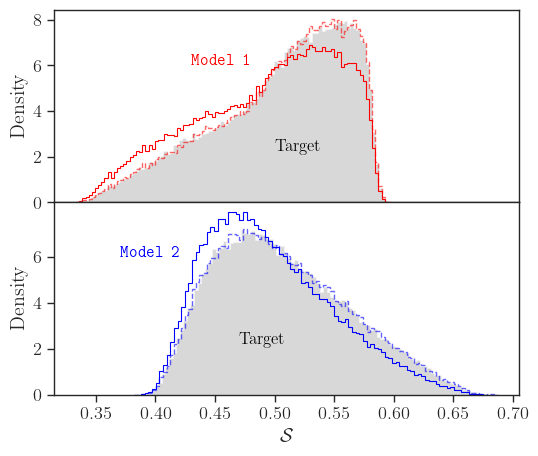

In [78]:
base_a = 0.72
base_b = 0.88
base_a_2 = 0.64
base_b_2 = 1.08

truth_scores = np.load(f"./classifier_figs/data/classifier_{base_a}_{base_b}_exp_scores.npy")
base_scores = np.load(f"./classifier_figs/data/classifier_{base_a}_{base_b}_sim_scores.npy")
truth_weights = np.load(f"./classifier_figs/data/reweights_{base_a}_{base_b}.npy")
truth_scores_2 = np.load(f"./classifier_figs/data/classifier_{base_a_2}_{base_b_2}_exp_scores.npy")
base_scores_2 = np.load(f"./classifier_figs/data/classifier_{base_a_2}_{base_b_2}_sim_scores.npy")
truth_weights_2 = np.load(f"./classifier_figs/data/reweights_{base_a_2}_{base_b_2}.npy")

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,5), sharex=True)

bins = 100

# Top subplot
ax1.hist(truth_scores, bins=bins, histtype='stepfilled', color='gray', alpha=0.3, label=r'$(0.68, 0.98)$', density=True)
ax1.hist(base_scores, bins=bins, histtype='step', color='red', density=True, label=r'$(0.72, 0.88)$')
ax1.hist(base_scores, weights=truth_weights, bins=bins, histtype='step', color='red', label=r'$(0.72, 0.88) \to (0.68, 0.98)$', density=True, alpha=0.6, linewidth=1.0, linestyle='--')
ax1.set_ylabel(r'$\mathrm{Density}$')
ax1.set_yticks([0, 2, 4, 6, 8])
#ax1.legend(frameon=False, fontsize=10.5, ncols=1, bbox_to_anchor=(0.45, 0.57))

# Bottom subplot
ax2.hist(truth_scores_2, bins=bins, histtype='stepfilled', color='gray', alpha=0.3, label=r'$(0.68, 0.98)$', density=True)
ax2.hist(base_scores_2, bins=bins, histtype='step', color='blue', density=True, label=r'$(0.64, 1.08)$')
ax2.hist(base_scores_2, weights=truth_weights_2, bins=bins, histtype='step', color='blue', label=r'$(0.64, 1.08) \to (0.68, 0.98)$', density=True, alpha=0.6, linewidth=1.0, linestyle='--')
#ax2.set_xlabel(r'$\mathrm{Truth \ Score}$')
ax2.set_xlabel(r'$\mathcal{S}$')
ax2.set_ylabel(r'$\mathrm{Density}$')
#ax2.legend(frameon=False, fontsize=10.5, ncols=1, bbox_to_anchor=(0.52, 0.6))
# Remove the largest y-tick on the second plot
ax2.set_yticks([0, 2, 4, 6])
ax1.text(0.43, 6, r'$\texttt{Model 1}$', color = 'red', fontsize = 12)

fig.subplots_adjust(hspace=0)
ax2.text(0.37, 6, r'$\texttt{Model 2}$', color = 'blue', fontsize = 12)
ax1.text(0.5, 2.2, r'$\mathrm{Target}$', color = 'black', fontsize = 12)
ax2.text(0.47, 2.2, r'$\mathrm{Target}$', color = 'black', fontsize = 12)

fig.savefig('classifier_score_distribution.pdf', dpi=300, bbox_inches='tight')

### Bootstrapping contours

In [16]:
# Confidence ellipse 
from matplotlib.patches import Ellipse
def plot_confidence_ellipse(tuned_params, ax=None, n_std=1.96, facecolor='none', save_path=None, **kwargs):
    """
    Create a plot of a confidence ellipse for the bootstrapped parameters.
    
    Args:
        tuned_params: k x 2 array where each row contains a pair of [a, b].
        ax: Matplotlib Axes object where the ellipse will be drawn.
        n_std: Number of standard deviations to determine the ellipse size.
        facecolor: Color of the ellipse (default is transparent).
        **kwargs: Other keyword arguments for the ellipse.
    """
    # Mean of the bootstrapped parameters (center of the ellipse)
    means = np.mean(tuned_params, axis=0)
    print("Number of data points:", len(tuned_params))
    print("Means:", means)
    
    # Covariance matrix
    cov = np.cov(tuned_params, rowvar=False)
    
    # Eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Calculate angle of rotation for the ellipse
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    
    # Width and height of the ellipse
    width, height = 2 * n_std * np.sqrt(eigvals)
    
    # Create the ellipse
    ellipse = Ellipse(xy=means, width=width, height=height, angle=angle, facecolor=facecolor, **kwargs)

    if ax is None:
        fig, ax = plt.subplots()
        ax.add_patch(ellipse)
        ax.set_xlim(means[0] - 3 * width, means[0] + 3 * width)
        ax.set_ylim(means[1] - 3 * height, means[1] + 3 * height)
        ax.set_xlabel('Parameter a')
        ax.set_ylabel('Parameter b')
        
        if save_path:
            plt.savefig(save_path)
            print(f"Plot saved to {save_path}")
        else:
            plt.show()
    # Add the ellipse to existing plot
    else: ax.add_patch(ellipse)

Number of data points: 1000
Means: [0.67714321 0.98509092]
Number of data points: 1000
Means: [0.67990617 0.98712352]
Number of data points: 1000
Means: [0.6821673  0.98721502]


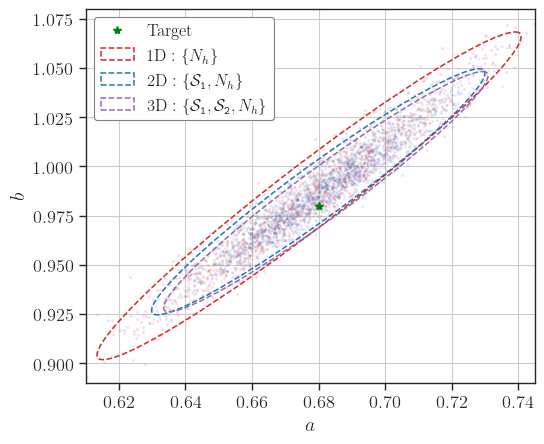

In [146]:
# Load external LaTeX dependency
#plt.rc('text.latex', preamble=r'\usepackage[dvipsnames]{xcolor}')
#plt.rcParams['text.latex.preamble'] = r'\usepackage{xcolor}'
plt.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'pgf.preamble': r'\usepackage{color}',
    'text.usetex': True,
    'text.latex.preamble':  r'\usepackage{color}',
})

bootstrap_mult_Adam_best = np.load("./classifier_figs/data/bootstrap_mult_Adam_best.npy")[:1000]
bootstrap_2D_Adam_best = np.load("./classifier_figs/data/bootstrap_2D_Adam_best.npy")[:1000]
bootstrap_3D_Adam_best = np.load("./classifier_figs/data/bootstrap_3D_Adam_best.npy")[:1000]

# Scatter plot of the tuned (a, b) pairs
s=2
fig, ax = plt.subplots(figsize=(6,5))
#colors = ['orangered', 'cornflowerblue', 'darkviolet']
colors = ['tab:red', 'tab:blue', 'tab:purple']
ax.scatter(bootstrap_mult_Adam_best[:, 0], bootstrap_mult_Adam_best[:, 1], s=s, alpha=0.1, color=colors[0], rasterized=True)
ax.scatter(bootstrap_2D_Adam_best[:, 0], bootstrap_2D_Adam_best[:, 1], s=s, alpha=0.1, color=colors[1], rasterized=True)
ax.scatter(bootstrap_3D_Adam_best[:, 0], bootstrap_3D_Adam_best[:, 1], s=s, alpha=0.1, color=colors[2], rasterized=True)

a_b_target = np.array([0.68, 0.98]) # Monash
ax.plot(a_b_target[0], a_b_target[1], '*', color='green', ms = 6, linewidth=40, label = r'$\mathrm{Target}$')

# Plot the confidence ellipse (95% confidence interval)
import scipy
conf = 0.95
conf_fac = np.sqrt(scipy.stats.chi2.ppf(conf, df=2))
plot_confidence_ellipse(bootstrap_mult_Adam_best, ax, n_std=conf_fac, edgecolor=colors[0], linestyle='--',
                       label=r'$1\mathrm{D}:$ $\{N_h\}$', lw = 1.1)
plot_confidence_ellipse(bootstrap_2D_Adam_best, ax, n_std=conf_fac, edgecolor=colors[1], linestyle='--',
                       label=r'$2\mathrm{D}:$ $\{ \textcolor{red}{\mathcal{S}_{\mathtt{1}}}, N_h \}$', lw = 1.1)
plot_confidence_ellipse(bootstrap_3D_Adam_best, ax, n_std=conf_fac, edgecolor=colors[2], linestyle='--',
                       label=r'$3\mathrm{D}:$ $\{\textcolor{red}{\mathcal{S}_{\mathtt{1}}}, \textcolor{blue}{\mathcal{S}_{\mathtt{2}}}, N_h \}$', lw = 1.1)
plt.xlim((0.61,0.745))
plt.ylim((0.89,1.08))

# Label and show the plot
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')
ax.legend(fontsize=12, edgecolor='gray', frameon=True, framealpha=1.0)
plt.grid(True)
fig.tight_layout()
fig.savefig("bootstrap_v1.pdf", dpi=300, bbox_inches='tight', backend='pgf')

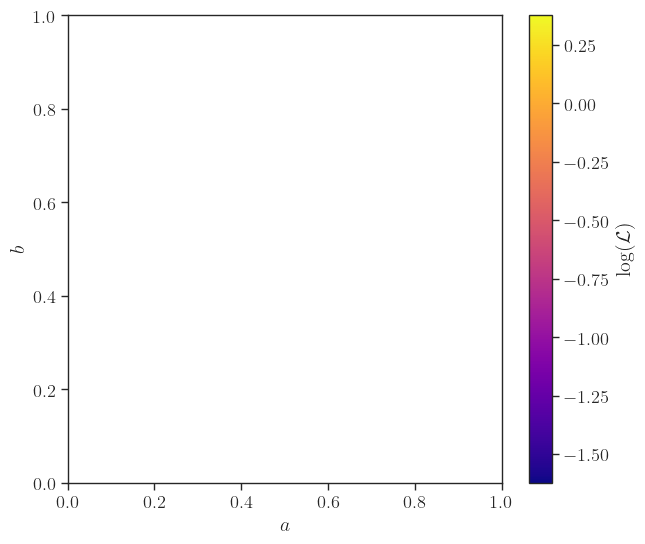

In [77]:
# Empty placeholder fig
fig, ax = plt.subplots(figsize=(7,6))
fig.colorbar(heatmap, ax=ax, label=r'$\log (\mathcal{L})$')
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')
#ax.set_title(r'$\texttt{Placeholder}$')
fig.tight_layout()
fig.savefig("empty.pdf", dpi=300, bbox_inches='tight')

In [ ]:
# Create 4x4 loss landscape grid
